## <b>■ 딥러닝 복습</b>
    1장. numpy
    2장. 퍼셉트론
    3장. 3층 신경망 구현
    4장. 2층 신경망 구현(수치미분)
    5장. 2층 신경망 구현(오차역전파)      tensorflow 1.x -> tensorflow 2.x
    --------------------------------------------------------------------
    6장. 신경망 학습시키는 기술들
    7장. CNN을 이용한 신경망 구현
    -------------------------------------------------------------------- 자전거 타는 법

    6장. 신경망 학습시키는 기술들
        1. 언더피팅 방지하는 방법
            - 가중치 초기값 선정
                ① Xavier
                ② He
            - 배치 정규화
        2. 오버피팅 방지하는 방법
### <b>■ 텐서플로우로 가중치 초기값 선정하는 방법</b>
    1. Xavier
![fig6-14](fig6-13.png)

$$ {{1} \over {\sqrt{n}}} \cdot \rm{np.random.randn(r,c)}$$

In [ ]:
W1 = tf.get_variable(name='W1', shape=[784,50], initializer = tf.contrib.layers.xavier_initializer())

    2. He 가중치 초기값 구성
$$ \sqrt{{{2} \over {n}}} \cdot \rm{np.random.randn(r,c)} $$

In [ ]:
W1 = tf.get_variable(name="W1", shape=[784,50], initializer = tf.contrib.layers.variance_scaling_initializer())

#### 예제1. 어제 마지막 문제로 만들었던 텐서 플로우로 구현한 신경망 코드에 가중치 초기값을 xavier로 해서 구현하시오

In [9]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

tf.reset_default_graph()

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name='W1', shape=[784,50], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.ones([1,50]))

y = tf.matmul(x, W1) + b1
y_hat = tf.nn.relu(y)

# 출력층
W2 = tf.get_variable(name='W2', shape=[50,10], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y_hat,W2) + b2
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
{1} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.92
{2} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.98
{3} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.99
{4} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.94
{5} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
{6} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
{7} 에폭 훈련데이터 정확도 :  0.96 	 테스트 데

### ※ 문제137. 이번에는 가중치 초기값을 He로 해서 수행하시오

In [10]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name="W1", shape=[784,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([1,50]))

y = tf.matmul(x, W1) + b1
y_hat = tf.nn.relu(y)

# 출력층
W2 = tf.get_variable(name="W2", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y_hat,W2) + b2
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
{1} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.96
{2} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 1.0
{3} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
{4} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.99
{5} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
{6} 에폭 훈련데이터 정확도 :  0.97 	 테스트 데이터 정확도: 0.93
{7} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.98
{8} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.97
{9} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.97
{10} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.98
{11} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
{12} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
{13} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.95
{14} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
{15} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
{16} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.96
{17} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
{18} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.

### ※ 문제138. 위의 2층 신경망을 3층 신경망으로 변경하시오
    기존층 : 입력층 -------> 은닉1층 ------> 출력층
             784             100             10
    변경후 : 입력층 -------> 은닉1층 ------> 은닉2층 -------> 출력층
             784             100             50              10

In [12]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name="W1", shape=[784,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([1,100]))

y = tf.matmul(x, W1) + b1
y_hat = tf.nn.relu(y)

# 은닉2층
W2 = tf.get_variable(name="W2", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,50]))

y2 = tf.matmul(y_hat,W2) + b2
y2_hat = tf.nn.relu(y2)

# 출력층
W3 = tf.get_variable(name="W3", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y2_hat,W3) + b3
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
{1} 에폭 훈련데이터 정확도 :  0.91 	 테스트 데이터 정확도: 0.95
{2} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
{3} 에폭 훈련데이터 정확도 :  0.97 	 테스트 데이터 정확도: 0.98
{4} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.93
{5} 에폭 훈련데이터 정확도 :  0.97 	 테스트 데이터 정확도: 0.97
{6} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.96
{7} 에폭 훈련데이터 정확도 :  0.97 	 테스트 데이터 정확도: 0.96
{8} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.96
{9} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.96
{10} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.97
{11} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
{12} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
{13} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
{14} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
{15} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.94
{16} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.93
{17} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.98
{18} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확

### <b>■ 텐서 플로우로 배치 정규화 구현하는 방법</b>
    배치 정규화 - 신경망 학습시 가중치 값의 데이터가 골고루 분산될 수 있도록 강제화 하는 장치
        층이 깊어져도 가중치의 정규분포를 계속 유지할 수 있도록 층마다 강제화 하는 장치
    
```python
batch_z1 = tf.contrib.layers.batch_norm(z1, True)
```
    Affine1 ------> 배치 정규화 ------> ReLU
     (z1)
     
#### 예제1. 지금까지 완성한 신경망에 배치 정규화를 은닉 1층에 구현하시오

In [13]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name="W1", shape=[784,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([1,100]))

y1 = tf.matmul(x, W1) + b1

batch_y1 = tf.contrib.layers.batch_norm(y1, True)

y1_hat = tf.nn.relu(batch_y1)

# 은닉2층
W2 = tf.get_variable(name="W2", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,50]))

y2 = tf.matmul(y1_hat,W2) + b2
y2_hat = tf.nn.relu(y2)

# 출력층
W3 = tf.get_variable(name="W3", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y2_hat,W3) + b3
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.97
2 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
3 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.98
4 에폭 훈련데이터 정확도 :  0.96 	 테스트 데이터 정확도: 0.98
5 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
6 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
7 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.94
8 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.94
9 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
10 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
11 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.98
12 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
13 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.93
14 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
15 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.95
16 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 1.0
17 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
18 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
19 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도

### ※ 문제139. 은닉 2층에도 배치 정규화를 적용하시오

In [14]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name="W1", shape=[784,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([1,100]))

y1 = tf.matmul(x, W1) + b1

batch_y1 = tf.contrib.layers.batch_norm(y1, True)

y1_hat = tf.nn.relu(batch_y1)

# 은닉2층
W2 = tf.get_variable(name="W2", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,50]))

y2 = tf.matmul(y1_hat,W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# 출력층
W3 = tf.get_variable(name="W3", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y2_hat,W3) + b3
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.99
2 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.96
3 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.95
4 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
5 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
6 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
7 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
8 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
9 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
10 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
11 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 1.0
12 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
13 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
14 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
15 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 1.0
16 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
17 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
18 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
19 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 

In [ ]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME')
y1 = y1 + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W2 = tf.get_variable(name="W2", shape=[14*14*32,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,100]))

y2 = tf.matmul(y1, W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# 완전연결계층 2층 (3층)
W3 = tf.get_variable(name="W3", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,50]))

y3 = tf.matmul(y2_hat, W3) + b3

batch_y3 = tf.contrib.layers.batch_norm(y3, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W4 = tf.get_variable(name="W4", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W4) + b4
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))


### <b>■ 텐서 플로우로 dropout 적용하는 방법</b>
    드롭아웃(dropout) 사용해야하는 이유 - 오버피팅 방지
    구현 예시
```python    
keep_prob = tf.placeholder('float')
    0.8 -> 전체 뉴런 중 80%만 남기고 20% 랜덤으로 삭제
    1.0 -> 모든 뉴런을 그대로 남겨둔다
y3_drop = tf.nn.dropout(y3, keep_prob)
```
    훈련할 때는 뉴런을 삭제하고 테스트 할 때는 뉴런을 삭제하지 않으려고 keep_prob로 남겨둠

In [ ]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME')
y1 = y1 + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W2 = tf.get_variable(name="W2", shape=[14*14*32,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,100]))

y2 = tf.matmul(y1, W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# drop out
keep_prob = tf.placeholder('float')
y2_hat_drop = tf.nn.dropout(y2_hat, keep_prob)

# 완전연결계층 2층 (3층)
W3 = tf.get_variable(name="W3", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,50]))

y3 = tf.matmul(y2_hat_drop, W3) + b3

batch_y3 = tf.contrib.layers.batch_norm(y3, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W4 = tf.get_variable(name="W4", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W4) + b4
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))


In [15]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME')
y1 = y1 + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W2 = tf.get_variable(name="W2", shape=[14*14*32,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,100]))

y2 = tf.matmul(y1, W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# drop out
keep_prob = tf.placeholder('float')
y2_hat_drop = tf.nn.dropout(y2_hat, keep_prob)

# 완전연결계층 2층 (3층)
W3 = tf.get_variable(name="W3", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,50]))

y3 = tf.matmul(y2_hat_drop, W3) + b3

batch_y3 = tf.contrib.layers.batch_norm(y3, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W4 = tf.get_variable(name="W4", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W4) + b4
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

# 그래프 실행
with tf.Session() as sess:
    sess.run(init)
    for j in range(20):
        for i in range(600):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            test_xs, test_ys = mnist.test.next_batch(100)

            sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 0.9})
            
            if i == 0: # 1에폭마다 정확도 확인
                train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 1.0}) # 훈련 데이터의 정확도 
                test_acc = sess.run(accuracy, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0}) # 테스트 데이터의 정확도

                # 그래프용 리스트에 정확도 담기
                train_acc_list.append(train_acc) 
                test_acc_list.append(test_acc)

                print('훈련', str(j + 1) + '에폭 정확도 :', train_acc)
                print('테스트', str(j + 1) + '에폭 정확도 :', test_acc)
                print('-----------------------------------------------')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
훈련 1에폭 정확도 : 0.65
테스트 1에폭 정확도 : 0.46
-----------------------------------------------
훈련 2에폭 정확도 : 0.99
테스트 2에폭 정확도 : 0.98
-----------------------------------------------
훈련 3에폭 정확도 : 0.98
테스트 3에폭 정확도 : 0.99
-----------------------------------------------
훈련 4에폭 정확도 : 1.0
테스트 4에폭 정확도 : 0.98
-----------------------------------------------
훈련 5에폭 정확도 : 0.99
테스트 5에폭 정확도 : 1.0
-----------------------------------------------
훈련 6에폭 정확도 : 0.98
테스트 6에폭 정확도 : 0.98
-----------------------------------------------
훈련 7에폭 정확도 : 1.0
테스트 7에폭 정확도 : 1.0
-----------------------------------------------
훈련 8에폭 정확도 : 0.99
테스트 8에폭 정확도 : 0.98
-----------------------------------------------
훈련 9에폭 정확도 : 1.

KeyboardInterrupt: 

### <b>■ 훈련과 테스트 데이터의 정확도가 시각화 될 수 있도록 코드를 추가 </b>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
훈련 1에폭 정확도 : 0.65
테스트 1에폭 정확도 : 0.42
-----------------------------------------------
훈련 2에폭 정확도 : 0.99
테스트 2에폭 정확도 : 0.99
-----------------------------------------------
훈련 3에폭 정확도 : 1.0
테스트 3에폭 정확도 : 0.99
-----------------------------------------------
훈련 4에폭 정확도 : 1.0
테스트 4에폭 정확도 : 1.0
-----------------------------------------------
훈련 5에폭 정확도 : 1.0
테스트 5에폭 정확도 : 1.0
-----------------------------------------------
훈련 6에폭 정확도 : 1.0
테스트 6에폭 정확도 : 0.99
-----------------------------------------------
훈련 7에폭 정확도 : 0.99
테스트 7에폭 정확도 : 1.0
-----------------------------------------------
훈련 8에폭 정확도 : 0.98
테스트 8에폭 정확도 : 0.99
-----------------------------------------------
훈련 9에폭 정확도 : 1.0
테스트 9에폭 정확도 : 1.0
-----------------------------------------------
훈련 10에폭 정확도 : 1.0
테스트 10에폭 정확도 : 0.99
------------

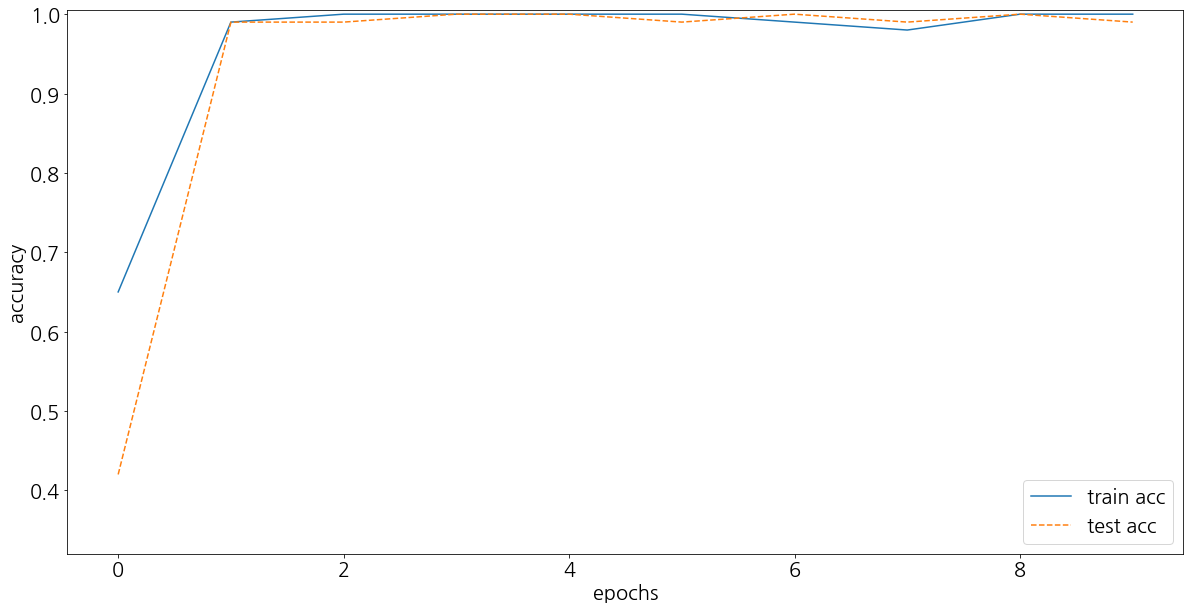

In [19]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME')
y1 = y1 + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W2 = tf.get_variable(name="W2", shape=[14*14*32,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,100]))

y2 = tf.matmul(y1, W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# drop out
keep_prob = tf.placeholder('float')
y2_hat_drop = tf.nn.dropout(y2_hat, keep_prob)

# 완전연결계층 2층 (3층)
W3 = tf.get_variable(name="W3", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,50]))

y3 = tf.matmul(y2_hat_drop, W3) + b3

batch_y3 = tf.contrib.layers.batch_norm(y3, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W4 = tf.get_variable(name="W4", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W4) + b4
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

# 그래프 실행
with tf.Session() as sess:
    sess.run(init)
    for j in range(10):
        for i in range(600):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            test_xs, test_ys = mnist.test.next_batch(100)

            sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 0.9})
            
            if i == 0: # 1에폭마다 정확도 확인
                train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 1.0}) # 훈련 데이터의 정확도 
                test_acc = sess.run(accuracy, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0}) # 테스트 데이터의 정확도

                # 그래프용 리스트에 정확도 담기
                train_acc_list.append(train_acc) 
                test_acc_list.append(test_acc)

                print('훈련', str(j + 1) + '에폭 정확도 :', train_acc)
                print('테스트', str(j + 1) + '에폭 정확도 :', test_acc)
                print('-----------------------------------------------')
                
# 그래프 작성
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.plot()
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(min(min(train_acc_list),min(test_acc_list))-0.1, 1.005)
plt.legend(loc='lower right')
plt.show()


### ※ 문제140. 위의 CNN 신경망을 아래와 같이 구현하시오
    변경 전 : 입력층 ----> Conv1 ----> pooling ----> FC1층 ----> FC2층 ----> 출력층
              784          32                        100         50          10
    변경 후 : 입력층 ----> Conv1 ----> pooling ----> Conv2 ----> pooling ----> FC1층 ----> FC2층 ----> 출력층
              784          32                         64                       100         50          10

In [24]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME') + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
# y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# Convolution 2층
W2 = tf.Variable(tf.random_normal([5,5,32,64], stddev=0.01)) 
b2 = tf.Variable(tf.ones([64])) # 숫자 1로 채워진 bias 생성
y2 = tf.nn.conv2d(y1, W2, strides=[1,1,1,1], padding='SAME') + b2
y2 = tf.nn.relu(y2)
y2 = tf.nn.max_pool(y2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') 
y2 = tf.reshape(y2, [-1,7*7*64]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W3 = tf.get_variable(name="W3", shape=[7*7*64,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,100]))

y3 = tf.matmul(y2, W3) + b3

batch_y2 = tf.contrib.layers.batch_norm(y3, True)

y2_hat = tf.nn.relu(batch_y2)

# drop out
keep_prob = tf.placeholder('float')
y2_hat_drop = tf.nn.dropout(y2_hat, keep_prob)

# 완전연결계층 2층 (3층)
W4 = tf.get_variable(name="W4", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,50]))

y4 = tf.matmul(y2_hat_drop, W4) + b4

batch_y3 = tf.contrib.layers.batch_norm(y4, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W5 = tf.get_variable(name="W5", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b5 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W5) + b5
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

# 그래프 실행
with tf.Session() as sess:
    sess.run(init)
    for j in range(10):
        for i in range(600):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            test_xs, test_ys = mnist.test.next_batch(100)

            sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 0.9})
            
            if i == 0: # 1에폭마다 정확도 확인
                train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 1.0}) # 훈련 데이터의 정확도 
                test_acc = sess.run(accuracy, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0}) # 테스트 데이터의 정확도

                # 그래프용 리스트에 정확도 담기
                train_acc_list.append(train_acc) 
                test_acc_list.append(test_acc)

                print('훈련', str(j + 1) + '에폭 정확도 :', train_acc)
                print('테스트', str(j + 1) + '에폭 정확도 :', test_acc)
                print('-----------------------------------------------')
                
# # 그래프 작성
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (20,10)
# plt.rcParams.update({'font.size':20})

# markers = {'train': 'o', 'test': 's'}
# x = np.arange(len(train_acc_list))

# plt.plot()
# plt.plot(x, train_acc_list, label='train acc')
# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
# plt.xlabel("epochs")
# plt.ylabel("accuracy")
# plt.ylim(min(min(train_acc_list),min(test_acc_list))-0.1, 1.005)
# plt.legend(loc='lower right')
# plt.show()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
훈련 1에폭 정확도 : 0.5
테스트 1에폭 정확도 : 0.21
-----------------------------------------------
훈련 2에폭 정확도 : 1.0
테스트 2에폭 정확도 : 0.98
-----------------------------------------------
훈련 3에폭 정확도 : 0.99
테스트 3에폭 정확도 : 1.0
-----------------------------------------------
훈련 4에폭 정확도 : 0.99
테스트 4에폭 정확도 : 0.98
-----------------------------------------------
훈련 5에폭 정확도 : 0.99
테스트 5에폭 정확도 : 0.98
-----------------------------------------------
훈련 6에폭 정확도 : 0.99
테스트 6에폭 정확도 : 0.97
-----------------------------------------------
훈련 7에폭 정확도 : 0.99
테스트 7에폭 정확도 : 1.0
-----------------------------------------------
훈련 8에폭 정확도 : 1.0
테스트 8에폭 정확도 : 0.99
-----------------------------------------------
훈련 9에폭 정확도 : 1.0
테스트 9에폭 정확도 : 1.0
-----------------------------------------------
훈련 10에폭 정확도 : 1.0
테스트 10에폭 정확도 : 0.98
----------

### <b>■ cifar10 데이터를 이용한 신경망 구성</b>
    cifar10은 총 6만 개의 데이터 셋으로 이루어져 있으며 그 중 5만 개가 훈련데이터, 1만 개가 테스트 데이터
    class는 비행기부터 트럭까지 총 10개
        1. 비행기
        2. 자동차
        3. 새
        4. 고양이
        5. 사슴
        6. 강아지
        7. 개구리
        8. 말
        9. 배
        10. 트럭
### <b>■ 신경망 구현 홈페이지를 만들려면 필요한 코드</b>
    1. 사진 데이터를 신경망에 로드하는 코드들
    2. 사진 이미지를 분류하는 신경망 코드 --> 구글
    3. 홈페이지 구축하는 코드(RShiny)
    
### <b>■ 1. 사진 데이터를 신경망에 로드하는 코드들</b>
#### 예제1. 사진을 불러와서 아래와 같이 이미지 이름을 출력하는 함수를 생성

In [26]:
import os


def image_load(path):
    file_list = os.listdir(path)
    return file_list


train_image = 'd:/tensor/cifar10/train100/'
print(image_load(train_image))

['1.png', '10.png', '100.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '4.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '5.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '6.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '7.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '8.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '9.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png']


#### 예제2. 위의 결과에서 .png는 빼고 숫자만 출력되게 하시오

In [28]:
import os
import re

def image_load(path):
    file_list = os.listdir(path)
    file_name = []
    for i in file_list:
        name = re.sub('[^0-9]','',i)
        file_name.append(name)
        
    return file_name

train_image = 'd:/tensor/cifar10/train100/'
print(image_load(train_image))

['1', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


#### 예제3. 위의 결과를 정렬해서 출력하시오

In [34]:
import os
import re


def image_load(path):
    file_list = os.listdir(path)
    file_name = []
    for i in file_list:
        file_name.append(int(re.sub('[^0-9]', '', i)))

    file_name.sort()

    return file_name


train_image = 'd:/tensor/cifar10/train100/'
print(image_load(train_image))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


#### 예제4. 위의 출력된 결과에서 다시 .png를 붙여서 아래와 같이 출력되게 하시오

In [37]:
import os
import re


def image_load(path):
    file_list = os.listdir(path)

    file_name = []
    for i in file_list:
        file_name.append(int(re.sub('[^0-9]', '', i)))

    file_name.sort()

    file_res = []
    for i in file_name:
        file_res.append(str(i)+'.png')

    return file_res


train_image = 'd:/tensor/cifar10/train100/'
print(image_load(train_image))

['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png']


#### 예제5. 이미지 이름 앞에 절대 경로가 아래처럼 붙게 하시오
    ['d:/tensor/cifar10/train100/1.png','d:/tensor/cifar10/train100/2.png',...,'d:/tensor/cifar10/train100/100.png']

In [41]:
import os
import re


def image_load(path):
    file_list = os.listdir(path)

    file_name = []
    for i in file_list:
        file_name.append(int(re.sub('[^0-9]', '', i)))

    file_name.sort()

    file_res = []
    for i in file_name:
        file_res.append(path+str(i)+'.png')

    return file_res


train_image = 'd:/tensor/cifar10/train100/'
print(image_load(train_image))

['d:/tensor/cifar10/train100/1.png', 'd:/tensor/cifar10/train100/2.png', 'd:/tensor/cifar10/train100/3.png', 'd:/tensor/cifar10/train100/4.png', 'd:/tensor/cifar10/train100/5.png', 'd:/tensor/cifar10/train100/6.png', 'd:/tensor/cifar10/train100/7.png', 'd:/tensor/cifar10/train100/8.png', 'd:/tensor/cifar10/train100/9.png', 'd:/tensor/cifar10/train100/10.png', 'd:/tensor/cifar10/train100/11.png', 'd:/tensor/cifar10/train100/12.png', 'd:/tensor/cifar10/train100/13.png', 'd:/tensor/cifar10/train100/14.png', 'd:/tensor/cifar10/train100/15.png', 'd:/tensor/cifar10/train100/16.png', 'd:/tensor/cifar10/train100/17.png', 'd:/tensor/cifar10/train100/18.png', 'd:/tensor/cifar10/train100/19.png', 'd:/tensor/cifar10/train100/20.png', 'd:/tensor/cifar10/train100/21.png', 'd:/tensor/cifar10/train100/22.png', 'd:/tensor/cifar10/train100/23.png', 'd:/tensor/cifar10/train100/24.png', 'd:/tensor/cifar10/train100/25.png', 'd:/tensor/cifar10/train100/26.png', 'd:/tensor/cifar10/train100/27.png', 'd:/tenso

#### 예제6. cv2.imread 함수를 이용해서 이미지를 숫자로 변경하시오

In [44]:
import os
import re
import numpy as np
import cv2

def image_load(path):
    file_list = os.listdir(path)

    file_name = []
    for i in file_list:
        file_name.append(int(re.sub('[^0-9]', '', i)))

    file_name.sort()

    file_res = []
    for j in file_name:
        file_res.append(path+str(j)+'.png')
        
    image = []
    for k in file_res:
        image.append(cv2.imread(k))

    return np.array(image)


train_image = 'd:/tensor/cifar10/train100/'
print(image_load(train_image))

[[[[ 63  62  59]
   [ 45  46  43]
   [ 43  48  50]
   ...
   [108 132 158]
   [102 125 152]
   [103 124 148]]

  [[ 20  20  16]
   [  0   0   0]
   [  0   8  18]
   ...
   [ 55  88 123]
   [ 50  83 119]
   [ 57  87 122]]

  [[ 21  24  25]
   [  0   7  16]
   [  8  27  49]
   ...
   [ 50  84 118]
   [ 50  84 120]
   [ 42  73 109]]

  ...

  [[ 96 170 208]
   [ 34 153 201]
   [ 26 161 198]
   ...
   [ 70 133 160]
   [  7  31  56]
   [ 20  34  53]]

  [[ 96 139 180]
   [ 42 123 173]
   [ 30 144 186]
   ...
   [ 94 148 184]
   [ 34  62  97]
   [ 34  53  83]]

  [[116 144 177]
   [ 94 129 168]
   [ 87 142 179]
   ...
   [140 184 216]
   [ 84 118 151]
   [ 72  92 123]]]


 [[[187 177 154]
   [136 137 126]
   [ 95 104 105]
   ...
   [ 71  95  91]
   [ 71  90  87]
   [ 70  81  79]]

  [[169 160 140]
   [154 153 145]
   [118 125 125]
   ...
   [ 78  99  96]
   [ 62  80  77]
   [ 61  73  71]]

  [[164 155 140]
   [149 146 139]
   [112 115 115]
   ...
   [ 64  82  79]
   [ 55  70  68]
   [ 55  69

### <b>■ 데이터를 신경망에 로드하기 위해 필요한 총 4개의 함수</b>
    1. image_load : 데이터를 숫자로 변환하는 함수
    2. label_load : 정답 숫자를 one hot encoding하는 함수
    3. next_batch : 배치 단위로 데이터 가져오는 함수
    4. shuffle_batch : 이미지 데이터를 shuffle 하는 함수    

#### 예제8. train_label.csv의 숫자를 출력하는 함수를 만드시오

In [46]:
train_label = 'd:/tensor/cifar10/train_label.csv'

import csv

def label_load(path):
    file = open(path)    
    label_data = csv.reader(file)
    
    label_list = []    
    for i in label_data:
        label_list.append(i)
        
    return label_list
print(label_load(train_label))

50000


#### 예제9. 위의 결과가 문자가 아니라 숫자로 출력되게 하시오

In [48]:
train_label = 'd:/tensor/cifar10/train_label.csv'

import csv
import numpy as np

def label_load(path):
    file = open(path)    
    label_data = csv.reader(file)
    
    label_list = []    
    for i in label_data:
        label_list.append(i)
    
    label = np.array(label_list).astype(int)
        
    return label
print(label_load(train_label))

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


#### 예제10. 아래의 결과를 출력하시오
    [0 0 0 1 0 0 0 0 0 0]

In [49]:
import numpy as np
print(np.eye(10)[4])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### 예제11. 위의 np.eye를 가지고 예제 9에서 출력하고 있는 숫자들이 아래와 같이 one hot encoding된 숫자로 출력되게 하시오
    [0 0 0 1 0 0 0 0 0 0]
    [0 0 1 0 0 0 0 0 0 0]
    [1 0 0 0 0 0 0 0 0 0]
    [0 0 0 0 0 0 0 1 0 0]
            ...

In [51]:
train_label = 'd:/tensor/cifar10/train_label.csv'

import csv
import numpy as np

def label_load(path):
    file = open(path)    
    label_data = csv.reader(file)
    
    label_list = []    
    for i in label_data:
        label_list.append(i)
    
    label = np.eye(10)[np.array(label_list).astype(int)]
    
    return label

print(label_load(train_label))

[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 1.]]

 ...

 [[0. 0. 0. ... 0. 0. 1.]]

 [[0. 1. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]]]


#### 예제12. 위의 결과는 3차원인데 신경망에서 라벨을 사용하려면 2차원이어야 하므로 차원을 2차원으로 축소시켜서 출력하시오

In [52]:
train_label = 'd:/tensor/cifar10/train_label.csv'

import csv
import numpy as np

def label_load(path):
    file = open(path)    
    label_data = csv.reader(file)
    
    label_list = []    
    for i in label_data:
        label_list.append(i)
    
    label = np.eye(10)[np.array(label_list).astype(int)].reshape(-1,10)
    
    return label

print(label_load(train_label))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


#### 예제13. 지금까지 만든 두 개의 함수 image_load와 label_load를 loader2.py라는 파이썬 코드에 저장하고 아래와 같이 loader2.py를 import한 후에 cifar10 전체 데이터를 로드하는 코드를 구현하시오

In [53]:
import loader2

train_image='D:/tensor/cifar10/train/'
train_label = 'D:/tensor/cifar10/train_label.csv'
test_image='D:/tensor/cifar10/test/'
test_label = 'D:/tensor/cifar10/test_label.csv'


trainX = loader2.image_load(train_image)
trainY = loader2.label_load(train_label)
testX = loader2.image_load(test_image)
testY = loader2.label_load(test_label)

print ( trainX.shape)
print ( trainY.shape)
print ( testX.shape)
print ( testY.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


#### 예제14. 신경망에 100장씩 데이터를 로드할 수 있도록 아래와 같이 next_batch 함수를 생성하시오

In [54]:
import loader2

def next_batch(data1, data2, init, final):
    return data1[init:final], data2[init:final]

test_image = 'D:/tensor/cifar10/test/'
test_label = 'D:/tensor/cifar10/test_label.csv'

testX = loader2.image_load(test_image)
testY = loader2.label_load(test_label)

print(next_batch(testX, testY, 0 ,100))

(array([[[[ 49, 112, 158],
         [ 47, 111, 159],
         [ 51, 116, 165],
         ...,
         [ 36,  95, 137],
         [ 36,  91, 126],
         [ 33,  85, 116]],

        [[ 51, 112, 152],
         [ 40, 110, 151],
         [ 45, 114, 159],
         ...,
         [ 31,  95, 136],
         [ 32,  91, 125],
         [ 34,  88, 119]],

        [[ 47, 110, 151],
         [ 33, 109, 151],
         [ 36, 111, 158],
         ...,
         [ 34,  98, 139],
         [ 34,  95, 130],
         [ 33,  89, 120]],

        ...,

        [[177, 124,  68],
         [148, 100,  42],
         [137,  88,  31],
         ...,
         [146,  97,  38],
         [108,  64,  13],
         [127,  85,  40]],

        [[168, 116,  61],
         [148, 102,  49],
         [132,  85,  35],
         ...,
         [130,  82,  26],
         [126,  82,  29],
         [107,  64,  20]],

        [[160, 107,  54],
         [149, 105,  56],
         [132,  89,  45],
         ...,
         [124,  77,  24],
       

#### 예제15. 아래와 같이 shuffle_batch 함수를 만들고 loader2.py에 추가시키시오

In [55]:
def shuffle_batch(data_list, label):
    x = np.arange(len(data_list))
    np.random.shuffle(x)
    
    data_list2 = data_list[x]
    label2 = label[x]
    
    return data_list2, label2

In [62]:
import loader2

test_image = 'D:/tensor/cifar10/test/'
test_label = 'D:/tensor/cifar10/test_label.csv'

testX = loader2.image_load(test_image)
testY = loader2.label_load(test_label)

print(loader2.shuffle_batch(testX, testY))

AttributeError: module 'loader2' has no attribute 'shuffle_batch'

### ※ 문제141. (오늘의 마지막 문제) 4개의 함수를 모두 loader2.py에 넣고 내일 옥스포드에서 설계한 vgg 신경망에 넣기 위해 아래와 같이 실행되게 하시오
```python
import loader2

train_image='D:/tensor/cifar10/train/'
train_label = 'D:/tensor/cifar10/train_label.csv'
test_image='D:/tensor/cifar10/test/'
test_label = 'D:/tensor/cifar10/test_label.csv'


trainX = loader2.image_load(train_image)
trainY = loader2.label_load(train_label)
testX = loader2.image_load(test_image)
testY = loader2.label_load(test_label)

testX, testY = loader2.shuffle_batch(testX, testY)
print(loader2.next_batch(testX, testY, 0, 100))
```

In [63]:
import loader2

train_image='D:/tensor/cifar10/train/'
train_label = 'D:/tensor/cifar10/train_label.csv'
test_image='D:/tensor/cifar10/test/'
test_label = 'D:/tensor/cifar10/test_label.csv'


trainX = loader2.image_load(train_image)
trainY = loader2.label_load(train_label)
testX = loader2.image_load(test_image)
testY = loader2.label_load(test_label)

testX, testY = loader2.shuffle_batch(testX, testY)
print(loader2.next_batch(testX, testY, 0, 100))

AttributeError: module 'loader2' has no attribute 'shuffle_batch'

### <b>■ 훈련시킨 가중치와 바이어스를 pickle 파일로 내리는 코드</b>